In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

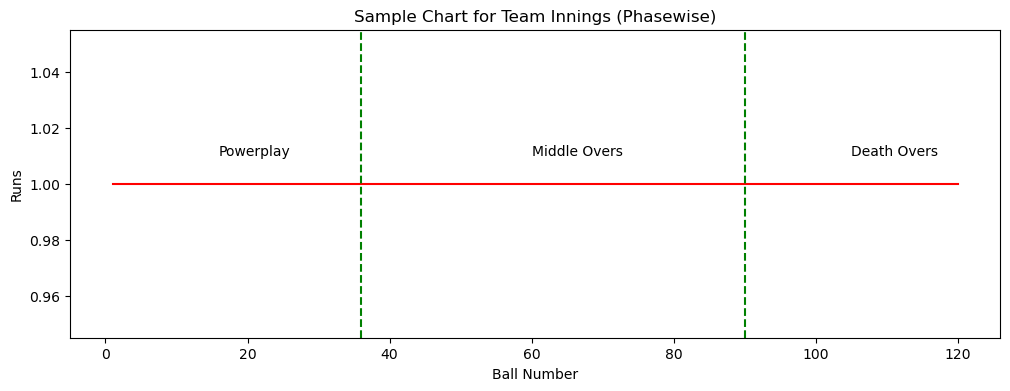

In [2]:
x = [i for i in range(1, 121)]
y = [1 for i in range(1, 121)]

plt.figure(figsize = (12, 4))
plt.plot(x, y, c = 'r')

plt.axvline(x = 36, ls = '--', c = 'g')
plt.axvline(x = 90, ls = '--', c = 'g')

plt.text(16, 1.01, "Powerplay")
plt.text(60, 1.01, "Middle Overs")
plt.text(105, 1.01, "Death Overs")

plt.xlabel("Ball Number")
plt.ylabel("Runs")
plt.title("Sample Chart for Team Innings (Phasewise)")
plt.show()

In [3]:
df = pd.read_csv('../../Datasets/deliveries_updated_mens_ipl.csv')

In [4]:
df.head(2)

,matchId,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed
0,1082591,1,0.1,0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1082591,1,0.2,0,2,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.matchId.unique()

array([1082591, 1082592, 1082593, 1082594, 1082595, 1082596, 1082597,
       1082598, 1082599, 1082600, 1082601, 1082602, 1082603, 1082604,
       1082605, 1082606, 1082607, 1082608, 1082609, 1082610, 1082611,
       1082612, 1082613, 1082614, 1082615, 1082616, 1082617, 1082618,
       1082620, 1082621, 1082622, 1082623, 1082624, 1082625, 1082626,
       1082627, 1082628, 1082629, 1082630, 1082631, 1082632, 1082633,
       1082634, 1082635, 1082636, 1082637, 1082638, 1082639, 1082640,
       1082641, 1082642, 1082643, 1082644, 1082645, 1082646, 1082647,
       1082648, 1082649, 1082650, 1136561, 1136562, 1136563, 1136564,
       1136565, 1136566, 1136567, 1136568, 1136569, 1136570, 1136571,
       1136572, 1136573, 1136574, 1136575, 1136576, 1136577, 1136578,
       1136579, 1136580, 1136581, 1136582, 1136583, 1136584, 1136585,
       1136586, 1136587, 1136588, 1136589, 1136590, 1136591, 1136592,
       1136593, 1136594, 1136595, 1136596, 1136597, 1136598, 1136599,
       1136600, 1136

In [79]:
def showWormGraph(df, match_id):
    
    df['total_runs'] = df['batsman_runs'] + df['extras']
    df = df[df.matchId == match_id]
    
    df1 = df[df.inning == 1]
    df2 = df[df.inning == 2]

    df1.reset_index(inplace = True, drop = True)
    df2.reset_index(inplace = True, drop = True)

    df1['cum_runs'] = 0
    df2['cum_runs'] = 0

    runs_count = 0
    for i in range(len(df1)):
        runs_count += df1['total_runs'][i]
        df1['cum_runs'][i] = runs_count

    runs_count = 0
    for i in range(len(df2)):
        runs_count += df2['total_runs'][i]
        df2['cum_runs'][i] = runs_count

    ball_no_ing1 = [i for i in range(1, len(df1) + 1)]
    ball_no_ing2 = [i for i in range(1, len(df2) + 1)]

    wk_index1 = list(df1[~df1.player_dismissed.isna()].index)
    wk_index2 = list(df2[~df2.player_dismissed.isna()].index)

    wk_runs1 = list(df1[df1.index.isin(wk_index1)].cum_runs)
    wk_runs2 = list(df2[df2.index.isin(wk_index2)].cum_runs)
    
    wk_name1 = list(df1[df1.index.isin(wk_index1)].player_dismissed)
    wk_name2 = list(df2[df2.index.isin(wk_index2)].player_dismissed)

    team1 = df1.batting_team[0]
    team2 = df2.batting_team[0]

    plt.figure(figsize = (16, 6))
    
    color1 = 'blue'
    color2 = 'orange'

    plt.plot(ball_no_ing1, df1.cum_runs, linewidth = 3, label = team1, color=color1)
    plt.plot(ball_no_ing2, df2.cum_runs, linewidth = 3, label = team2, color=color2)

    plt.scatter(wk_index1, wk_runs1, s = 150)
    plt.scatter(wk_index2, wk_runs2, s = 150)
    
#     for i in range(len(wk_name1)):
#         plt.text(wk_index1[i]-5, wk_runs1[i]-5, wk_name1[i], color=color1)
        
#     for i in range(len(wk_name2)):
#         plt.text(wk_index2[i]+5, wk_runs2[i]+5, wk_name2[i], color=color2)

    plt.axvline(x = 36, ls = '--', c = 'g')
    plt.axvline(x = 90, ls = '--', c = 'g')

    plt.text(16, 5, "Powerplay")
    plt.text(60, 5, "Middle Overs")
    plt.text(105, 5, "Death Overs")

    plt.xlabel("Ball Number")
    plt.ylabel("Runs")
    plt.title("Worm Chart - "+ team1 + ' vs '+team2, fontdict={'fontsize': 20})
    plt.rcParams['legend.fontsize'] = 15
    plt.xlim(0)
    plt.ylim(0)
    plt.legend()

    plt.show()

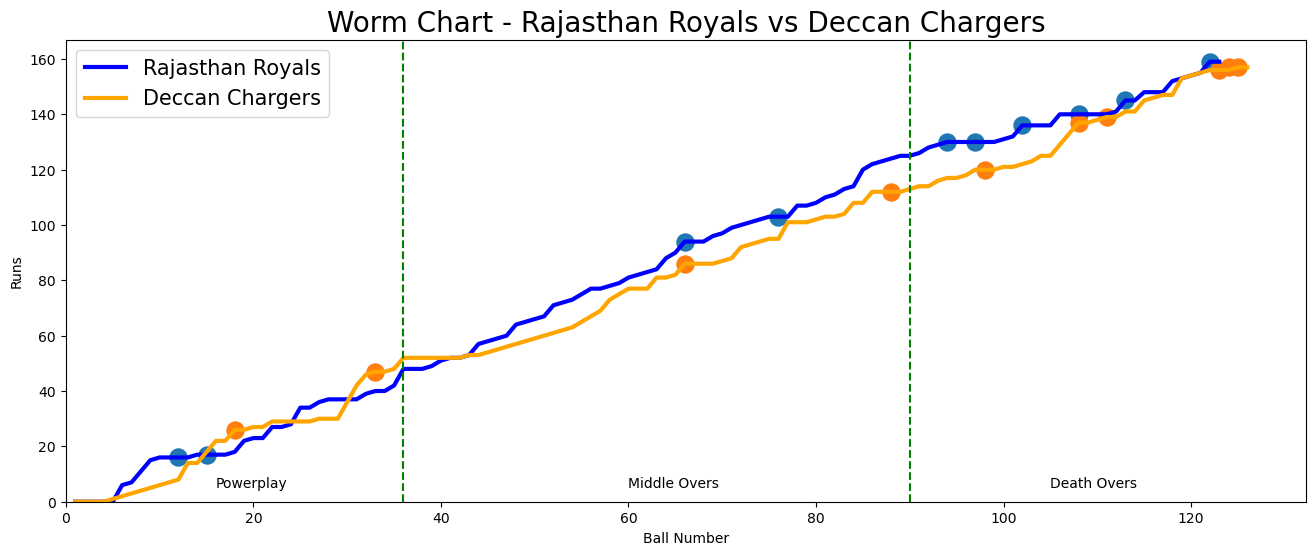

In [80]:
showWormGraph(df, 419141)